# Predict likelihood of a liability customer buying personal loans

###### Background :
This case is about a bank which has growing customer base. The bank is interested in expanding the customer base rapidly and wants to convert majority of the liability customer to asset customer to earn Interest. Last year campaign showed a significant conversion rate over 9% .
###### Objective: 
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan.
###### Data :
The data shared by the bank has the information of the 5000 customers including demographic information, customer's relationship with the bank and customer response to the last personal loan campaign.

In [2]:
# Importing the relevant libraries & Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# Importing the dataset & understand the attributes

In [3]:
# Defining the path to import the data
path = "C:/Users/user/Desktop/Great Learning/Supervised learning/Project 3/Bank_Personal_Loan_Modelling.csv"

In [4]:
# Importing the data
data=pd.read_csv(path)

In [5]:
# Viewing the data and attributes
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.shape # Dataset has 5000 observation for 14 attributes and column of interest is 
#Personal Loan (whether person has taken the personal loan or not)

(5000, 14)

In [7]:
# Checking the data types
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Checking missing value count
data.isnull().sum()
# No missing value is present in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# Sensecheck of the data
data.describe().transpose() 
# Experience can'nt have the negative value. Income is mostly right skewed as outliers are present.Same goes for mortgage aswell

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
# Since experience cann't be negative, we will convert negative value of experince to absolute value
data["Experience"]=data["Experience"].abs()

In [11]:
data.groupby(["Personal Loan"]).count()
# The data set is not balanced dataset as very few records is in class 1 i.e. the class of our interest.The dataset is highly
# dominated by the people who does not take the personal loan as < 10% of the people only taken loan.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


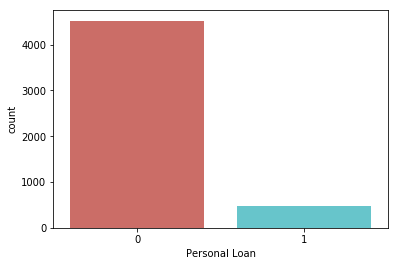

In [12]:
sb.countplot(x = "Personal Loan", data=data, palette = 'hls') # Visual representation

# Exploratory data analysis (EDA)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002522ECEC780>,
      dtype=object)

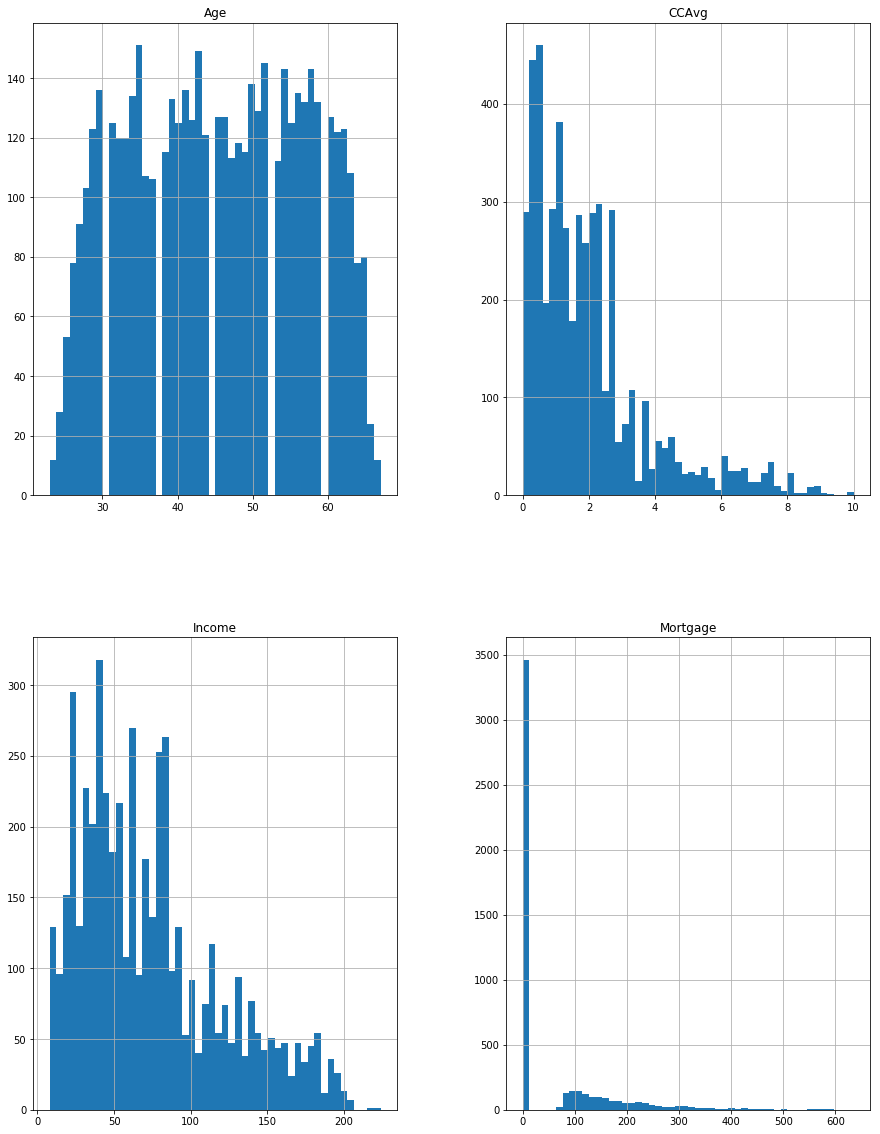

In [13]:
data_1 = data.loc[:, ('Age', 'Income', "CCAvg", "Mortgage")] 
data_1.hist(bins = 50, figsize = (15,20))
# Considering some of the important numeric variables (Age,CCAvg,Income and Mortgage) to check the distribution of the data.
# No special trend si present for Age, however the distribution of remianing numeric variables (CCAvg, Income & Mortgage)
# are skewed towards right.

<Figure size 432x288 with 0 Axes>

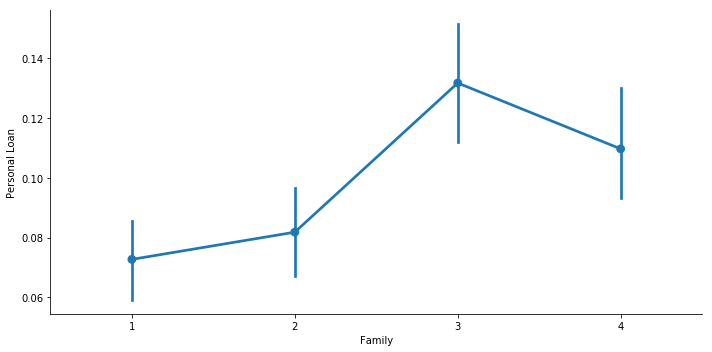

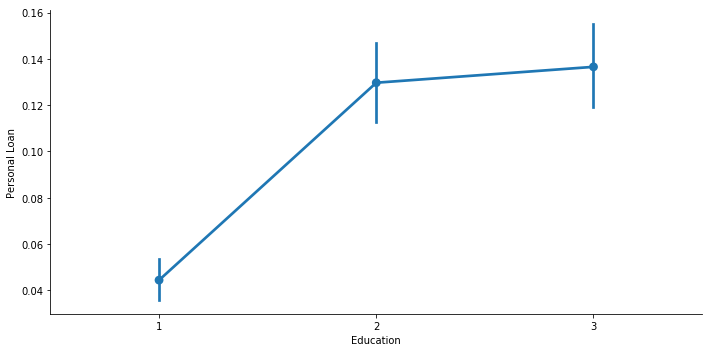

In [14]:
# Analysis of the ordinal variable Family and Education
for i, col in enumerate (['Family', 'Education']):
    plt.figure(i)
    sb.catplot(x=col, y='Personal Loan', data = data, kind='point', aspect =2, )
# It seems individual with higher Eductaion has greater chances of taking personal loan. 
# Same goes for family aswell if the family size is restricted till 3.

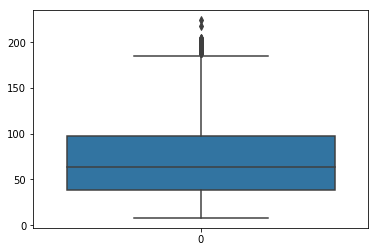

In [15]:
# Checking for outliers in Income and CCAvg
sb.boxplot(data = data['Income']) # Outlier values are present for both Income and CCAvg

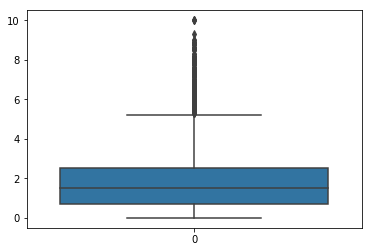

In [16]:
sb.boxplot(data=data["CCAvg"])

In [17]:
# Corrleation among variables
Correlation = data.corr()
Correlation

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


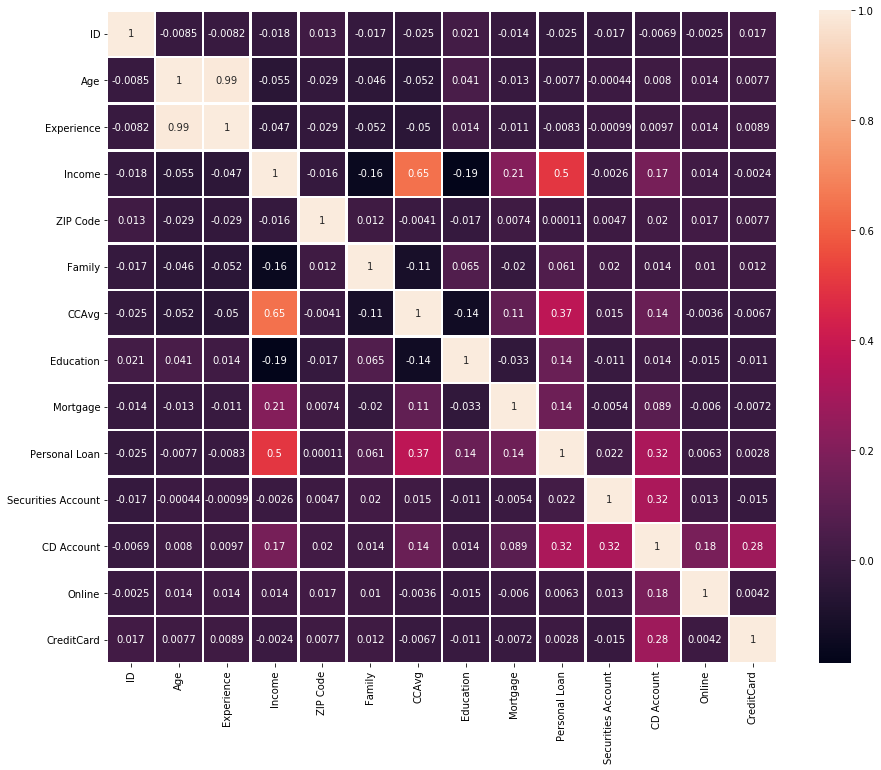

In [18]:
plt.figure(figsize=(15,12))
sb.heatmap(Correlation, annot = True, linewidths = 1.5)
# Slight positive corrleation is present between CCAvg and Income but we are going to drop anyone from the final variable list.

In [19]:
# Checking the data distribution in detailed
data_2= data.loc[:,('Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan')]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


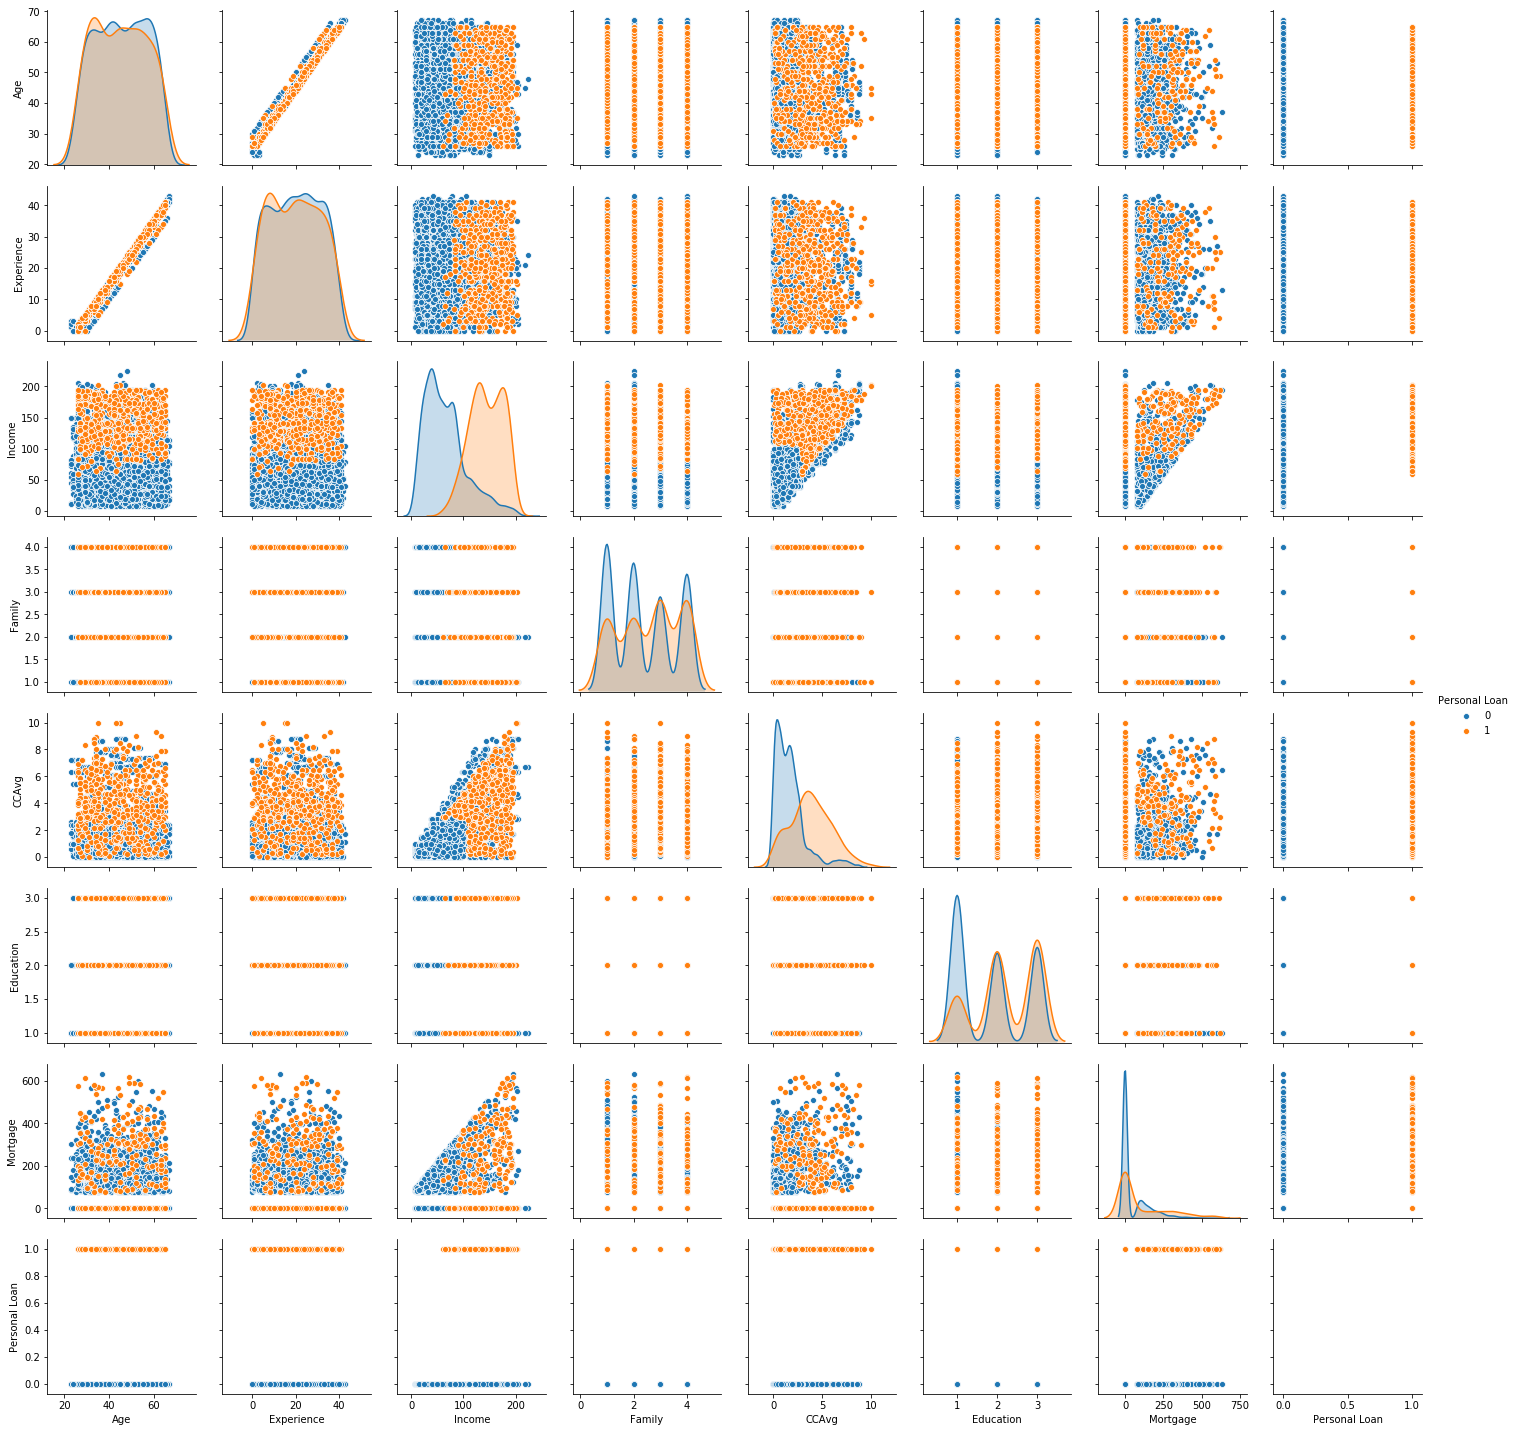

In [20]:
sb.pairplot(data=data_2, hue = 'Personal Loan')
# The concentration of the data point with personal loan (Point of Interest) is higher for high value of CCAvg, Income & Mortgage

# Dataset preparation (Training & Test)

In [21]:
X = data.loc[:, data.columns != "Personal Loan"]
Y = data.loc[:, data.columns == "Personal Loan"] 

In [22]:
# Impoting important libraries
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [23]:
# Spiliting the dataset into train, validation & test dataset (3:1:1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 124)

#for i in (y_train, y_val, y_test):
   # print(round(len(i)/len(Y),2))

# Model Development

# 1. Logistic Regression

In [24]:
## BASE MODEL (Without Hyper parameter tunnng)
# Create initial base logistic regression model to predict the loan affinity.
# Impoting the required module
from sklearn.linear_model import LogisticRegression
# Converting dataframe to array (logistic regression requires array)
X_train_1 = X_train.values 
y_train_1 = y_train.values
# Creating logistic regression object
LogReg = LogisticRegression() 
LogReg.fit(X_train_1, y_train_1)
y_expect=y_test
y_pred = LogReg.predict(X_test)
print("Accuracy:",accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification Score:\n",metrics.classification_report(y_test, y_pred))

Accuracy: 0.912
Confusion Matrix:
 [[1323   31]
 [ 101   45]]
Classification Score:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1354
           1       0.59      0.31      0.41       146

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.76      0.64      0.68      1500
weighted avg       0.90      0.91      0.90      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Although the overall accuracy is impressive but we have look for class level accuracy which is not upto the mark.Specially 
# the value of precision for class 1 since our intention is to predict the individual with affinity towards personal loan.
# So, we have to fine tune the model futher to improve the class level accuracy (precision)

In [26]:
## 2. MODEL TUNNING (With hyper parameter)
# Scaler transformation of the independent featurs to reduce domniance effect (differnt attributes are not in the same scale)
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=123)
# Creating logistic regression object to train the model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_expect=y_test
y_pred = LogReg.predict(X_test)
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification Report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.956
Confusion Matrix:
 [[1340   14]
 [  52   94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1354
           1       0.87      0.64      0.74       146

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.92      0.82      0.86      1500
weighted avg       0.95      0.96      0.95      1500



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# After scaler transformation of the indipendent features, precision for class 1 improve significantly (from 0.59 to 0.87).
# Also, overall accuracy improved significantly. Now lets try out other algorithm aswell to improve the model performce. 
# First will check the accuracy of the base model and then try to improve the model accuracy by tunning the hyperparameters.

# 2. Naive_bayes

In [28]:
## BASE MODEL (Without Hyper parameter tunnng) 
# Importing the library
from sklearn.naive_bayes import GaussianNB

In [34]:
NB_cl = GaussianNB()
NB_cl.fit(X_train, y_train)
y_expect = y_test
y_pred = NB_cl.predict(X_test)
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification Report:\n", metrics.classification_report(y_expect, y_pred))


Accuracy: 0.888
Confusion Matrix:
 [[1248  106]
 [  62   84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1354
           1       0.44      0.58      0.50       146

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.90      0.89      0.89      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Both overall(88%) and class level accuracy (44%) is lower compared to logistic regression model.

# 3. KNN (KNNeighbors Classification)

In [31]:
## BASE MODEL (Without Hyper parameter tunnng)
# Importing the library
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf=KNeighborsClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
y_expect=y_test
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification Report:\n", metrics.classification_report(y_expect, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy: 0.9506666666666667
Confusion Matrix:
 [[1344   10]
 [  64   82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.89      0.56      0.69       146

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [33]:
## 2. MODEL TUNNING (With hyper parameter)
#Importing the relevant module
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsClassifier(n_jobs=-1)
# Setting up the parameter
params = {'algorithm':['auto', 'ball_tree', 'kd_tree','brute'],
          'n_neighbors':[3,5,7,9,11,13,15],
          'leaf_size':[1,2,3,4,5],
          'weights':['uniform','distance'],
          'n_jobs':[-1]}
KNN1 = GridSearchCV(KNN, param_grid= params,n_jobs=-1)
KNN1.fit(X_train, y_train)
print("Best Hyper Parameters:", KNN1.best_params_)
y_pred = KNN1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyper Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.9513333333333334
Confusion_Matrix:
 [[1343   11]
 [  62   84]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1354
           1       0.88      0.58      0.70       146

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.92      0.78      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [77]:
# No improvement as such on overall and class level accuracy with hyper tunning of the model

# 4. Support Vector Machine (SVM)

In [60]:
## BASE MODEL (Without Hyper parameter tunnng)
# Importing the library
from sklearn import svm

In [61]:
# Training and testing the model
# Creating an SVM object to train the model
SVM = svm.SVC(random_state=1234) 
SVM.fit(X_train, y_train)
y_expect = y_test
y_pred = SVM.predict(X_test)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.9746666666666667
Confusion_Matrix:
 [[1350    4]
 [  34  112]]
Classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.97      0.77      0.85       146

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.97      0.88      0.92      1500
weighted avg       0.97      0.97      0.97      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [62]:
# The accuracy of both overall(97.4%) and class level accuracy(97%) is highest among all the models.

In [70]:
## 2. MODEL TUNNING (With hyper parameter)

# Importing the relevant modules
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# CReating an object to train the model
model=SVC(random_state=123)
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
          'kernel': ['linear','rbf','sigmoid'],
         'gamma':[0.001,0.01,0.1,1,10,100]}
# Creating model with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
y_pred = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyper Parameters:
 {'C': 13, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.9753333333333334
Confusion Matrix:
 [[1341   13]
 [  24  122]]
Classification report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1354
           1       0.90      0.84      0.87       146

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.94      0.91      0.93      1500
weighted avg       0.97      0.98      0.97      1500



In [ ]:
# The accuracy of our point of interest (precision) gets reduced with hyper tunning (from 97% to 90%).

# 5. Decision Tree Classifier

In [35]:
## BASE MODEL (Without Hyper parameter tunnng)
# Importing the required module
from sklearn.tree import DecisionTreeClassifier

In [37]:
# CReating a decision tree object to train the model
DT = DecisionTreeClassifier(random_state=1234)
DT.fit(X_train, y_train)
y_expect = y_test
y_pred = DT.predict(X_test)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.9806666666666667
Confusion_Matrix:
 [[1339   15]
 [  14  132]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.90      0.90      0.90       146

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.94      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [38]:
# Overall accuracy (98%) is very impressive but class level accuracy(90%) is lower compared to base Support vector machine. 

In [39]:
## 2. MODEL TUNNING (With hyper parameter)
# Importing the relevant module
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Training and evaluting the accuracy of the model
DT= DecisionTreeClassifier(random_state=1234)
# Setting the hyper parameter
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}


DT1 = GridSearchCV(DT, param_grid=params, n_jobs=-1)
DT1.fit(X_train, y_train)
print("Best Hyper Parameters:",DT1.best_params_)
y_pred=DT1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification_report:\n", metrics.classification_report(y_test, y_pred))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 123}
Accuracy: 0.966
Confusion Metrix:
 [[1330   24]
 [  27  119]]
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1354
           1       0.83      0.82      0.82       146

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.91      0.90      0.90      1500
weighted avg       0.97      0.97      0.97      1500



In [174]:
# There is not much of improvement in overall and class level accuracy after hyper tunning.

# 6. Random Forest Classifier

In [40]:
## BASE MODEL (Without Hyper parameter tunnng)
# Importing the required module
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Training the object and testing the accuracy of the model
RFC = RandomForestClassifier(n_jobs=-1,random_state=123)
RFC.fit(X_train, y_train)
y_expect = y_test
y_pred = RFC.predict(X_test)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.982
Confusion_Matrix:
 [[1349    5]
 [  22  124]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.96      0.85      0.90       146

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.97      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [151]:
# Both overall(98.2%) & class level(96%) accuracy is very impressive.

In [42]:
## 2. MODEL TUNNING (With hyper parameter)
from sklearn.model_selection import GridSearchCV
RFC=RandomForestClassifier()
# Parameter setting
params = {'criterion':['gini','entropy'],
    'n_estimators':[10,15,20,25,30,35],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[2,3,4,5,6,7,8],
    'random_state':[123],
    'n_jobs':[-1]}
RFC1=GridSearchCV(RFC, param_grid = params, n_jobs =-1)
RFC1.fit(X_train, y_train)
print("Best hyper parameters:", RFC1.best_params_)
y_pred = RFC1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyper parameters: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 35, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.984
Confusion Matrix: [[1348    6]
 [  18  128]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1354
           1       0.96      0.88      0.91       146

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
# Random forest model with hyper parameter tunning is the best model among all the model. It has highest overall 
# accuracy of 98.4% and class level accuracy (precision) of 96%

# Observations and Findings:

1. Understood the each attibute and data. The data set is all about the customer demograpics information and how they are maintaining the relationship with the bank. Also, the response towards peronsal loan captured in Personal Loan column.No missing value is present in the dataset for any attributes.

2. 
- Considered some of the important numeric variables (Age,CCAvg,Income and Mortgage) to check the distribution of those variables.No special trend is present for Age, however the distribution of remianing numeric variables (CCAvg, Income & Mortgage) are skewed towards right.
- For ordinal variables Family and Education, it seems individual with higher Eductaion has greater chances of taking personal loan & same goes for family aswell if the family size is restricted to 3.
- Outliers are present for Income and CCAvg and slight positive corrleation is present between both the variables.
- The concentration of the data point with personal loan (Point of Interest) is higher for high value of CCAvg, Income & Mortgage

3. The percentage distribution between both the class ( took personal loan vs who does not take personal loan) in terms of data point is not same. The dataset is highly dominated by the observation who deos not take the personal loan. Only <10% of the observation taken personal loan.

4. The entire dataset has been splited in 70:30 ratio for training and test dataset. The training datset (70%) used to train the model and testing data used to evaluate the model performance.

5. Differnt classification techniques like Logistic Regression,Naive Bayes, KNN, SVM,Decision tree, Random forest has been used to understand best performing algorithm. Both base model and hyper tunned models are created to improve the model performace and accruacy. Out of all the algorithm SVM & Random Forest are best performing models in terms overall and class level accruacy.
6. Confusion matrix has been generated to understand and evaluate the class level accuracy and misclassification percenatge in subsequent section under each model. The best class level accurcay for our point of interest (precision) has been achived for SVM, followed by hyper tunned Random forest model.

7. The best performing models are SVM and Random forest. The overall accuracy is highest for Random forest, however class level accuarcy for our point of interest (precision) is highest for SVM. Since, data is converted to the same scale and hyper tunning used, those models are performing better compared to other models. We can choose either of the model for deployment or futher can check the performce (which one is performing better than other) with unseen data before deployment.